In [1]:
import numpy as np 
from matplotlib import pyplot as plt   

In [81]:
xmin = -2; xmax = 2
ymin = -1; ymax = 1
num = 200
figsize_scale = 3

def plot_flow(psi_list, mask = None,
              x=np.linspace(xmin,xmax,num), y=np.linspace(ymin,ymax,num), h=1e-6):
    """
    Plot a potential flow using the streamfunction. The velocity
    vectors are approximated using finite differences.
    
    Inputs:
     - psi: stream function of x,y
     - mask: bool function of x,y for locations to be masked out
     - x,y: 1D spacing array in x,y. defaults to np.linspace(-2,2,25)
     - h:   finite different spacing to compute U,V. defaults to 1e-6
    """
    X,Y = np.meshgrid(x,y)
    if mask:
        X,Y = (np.ma.masked_where(mask(X,Y),X), 
               np.ma.masked_where(mask(X,Y),Y))
    U = 0; V = 0; PSI = 0
    for psi in psi_list:
        U +=  (psi(X,Y+h)-psi(X,Y-h))/(2*h)
        V += -(psi(X+h,Y)-psi(X-h,Y))/(2*h)
        PSI += psi(X,Y)
    
    plt.figure(figsize=(xmax*figsize_scale,ymax*figsize_scale),dpi=200)
    # plt.quiver(X,Y,U,V)
    plt.contour(X,Y,PSI, levels=80)
    plt.streamplot(X,Y,U,V, density=1.5, linewidth=0.8)
    plt.axis('equal')
    plt.show()

    # return X, Y, U, V, PSI


def cosd(angle_in_degree):
    return np.cos(np.deg2rad(angle_in_degree))

def sind(angle_in_degree):
    return np.sin(np.deg2rad(angle_in_degree))
    
PI = np.pi

class ElementaryFlows: # returns psi functions for the chosen flow
    def __init__(self):
        pass

    def uniform(self, U = 5, alpha = 60):
        return lambda  x, y: U*(y*cosd(alpha) - x*sind(alpha)) # alpha in degrees
    
    def source(self, x0 = 0, y0 = 0, m = 0.1): # if m < 0 -> sink
        return lambda x, y: m/(2*PI) * np.arctan((y-y0)/(x-x0))
    
    def vortex(self, circulation = 4):
        return lambda x, y: -circulation/(2*PI)*np.log(np.sqrt(x**2+y**2))
        
    def doublet(self, K = 10):
        return lambda x, y: -K*sind(np.arctan(y/x))/np.sqrt(x**2+y**2)


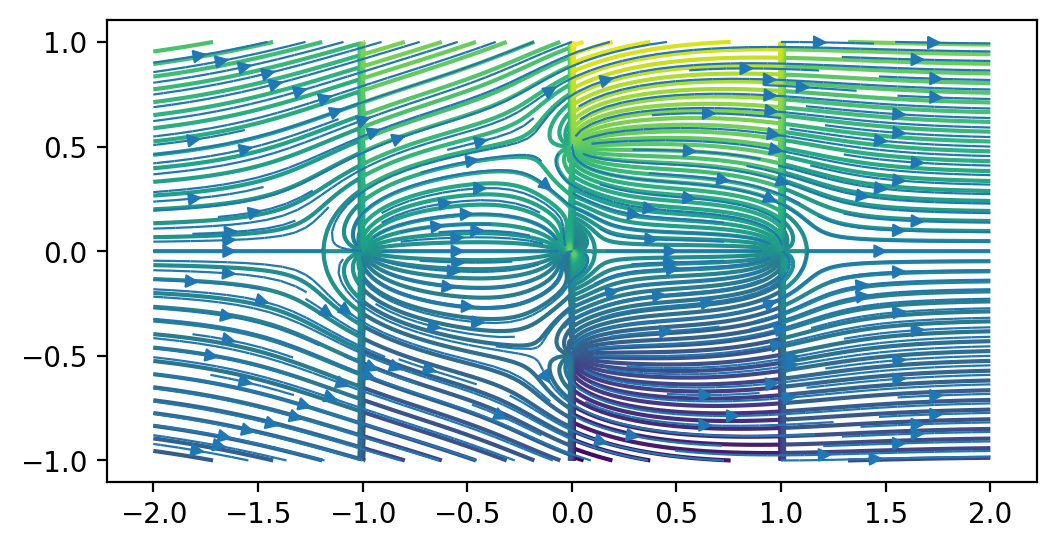

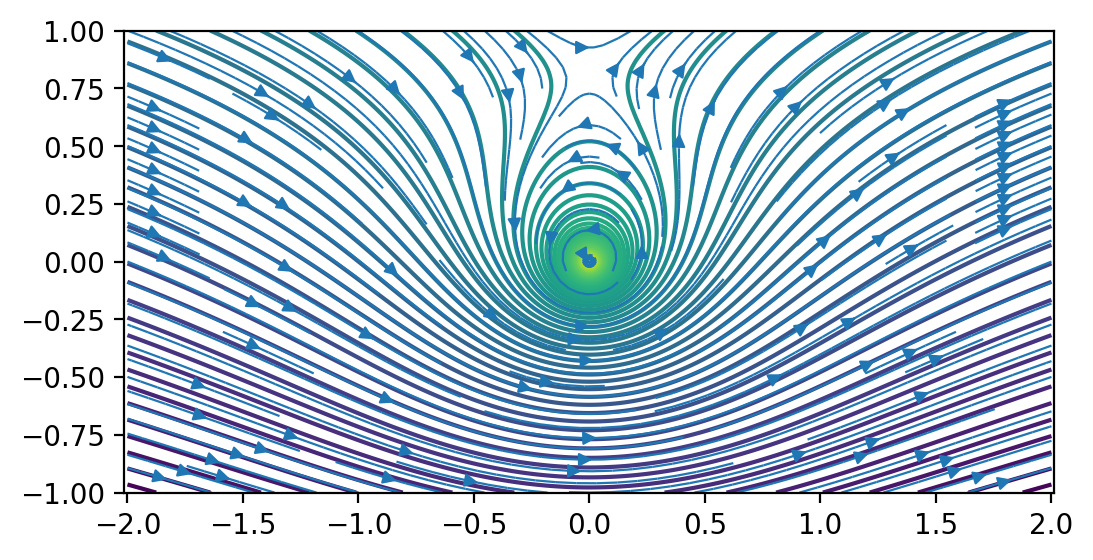

In [82]:
flows_maker = ElementaryFlows()

psi1 = flows_maker.uniform(10, 0)
psi2 = flows_maker.source(-1,0,10)
psi3 = flows_maker.source(1,0,-10)
psi4 = flows_maker.source(0,0.5,10)
psi5 = flows_maker.source(0,-0.5,10)
psi6 = flows_maker.doublet(10)
psi7 = flows_maker.vortex(50)
plot_flow([psi1, psi2, psi3, psi4, psi5, psi6])
plot_flow([psi1,psi7])
